In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_sample.csv')
life = df.loc[:,df.columns.str.contains('^life|^c')]
life_afica_europe = life[life.continent.isin(['Africa', 'Europe'])]
df_data = life_afica_europe.drop(columns = ['continent', 'country'])
df_data_scaled = (df_data - df_data.mean()) / df_data.std()
X=np.array(df_data_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


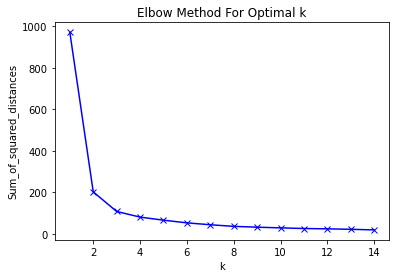

In [4]:
from sklearn.cluster import KMeans 

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_) # WCV 
# Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
#Chọn K=3

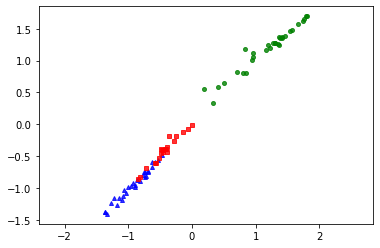

In [6]:
#1 - Kmeans
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans_display(X, kmeans.labels_)


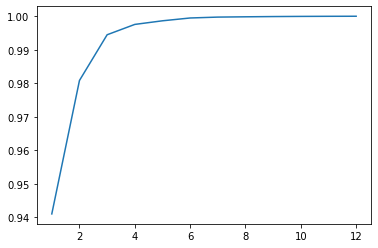

In [7]:
#2 - SVD
MTm=np.dot(df_data_scaled.T,df_data_scaled)
eig_values, eig_vector=np.linalg.eig(MTm)
S = np.diag(np.power(eig_values, 0.5))
sqrt_s=np.linalg.inv(S)
U=np.dot((np.dot(df_data_scaled,eig_vector)),sqrt_s)
#Chon K
sum_eig_values = np.sum(eig_values)
explained_variance = eig_values/ sum_eig_values
cumsum = np.cumsum(explained_variance)
import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(explained_variance) + 1, 1) , cumsum)


In [8]:
#CHỌN K=3
K=3

In [9]:
svd_df = pd.DataFrame(U[:, 0:K], columns = ['SVD1', 'SVD2','SVD3'])
svd_df['continent'] = life_afica_europe['continent'].tolist()
svd_df

,SVD1,SVD2,SVD3,continent
0,0.014940,-0.212346,-0.105692,Africa
1,-0.172656,0.046238,0.070696,Africa
2,-0.075906,-0.045773,-0.002210,Africa
3,-0.021360,0.189510,-0.245004,Africa
4,-0.111868,-0.052854,-0.043886,Africa
...,...,...,...,...
77,0.150337,-0.017090,-0.017145,Europe
78,0.167552,0.045535,0.058699,Europe
79,0.162142,0.011050,0.036203,Europe
80,0.020703,-0.163980,-0.034474,Europe


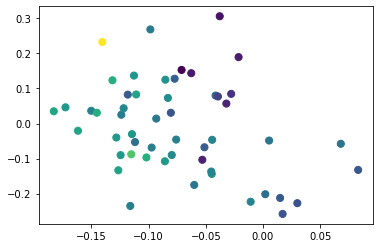

In [10]:
plt.scatter(x= svd_df.query('continent == "Africa"')['SVD1'],
            y= svd_df.query('continent == "Africa"')['SVD2'],
            c= svd_df.query('continent == "Africa"')['SVD3'], s = 50)

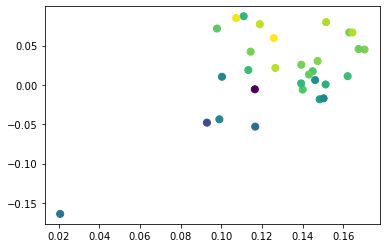

In [11]:
plt.scatter(x= svd_df.query('continent == "Europe"')['SVD1'],
            y= svd_df.query('continent == "Europe"')['SVD2'],
            c= svd_df.query('continent == "Europe"')['SVD3'], s = 50)

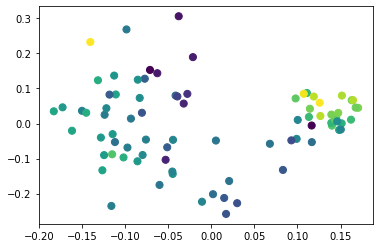

In [12]:
plt.scatter(x= svd_df.query('continent == "Africa"')['SVD1'],
            y= svd_df.query('continent == "Africa"')['SVD2'],
            c= svd_df.query('continent == "Africa"')['SVD3'], s = 50)
plt.scatter(x= svd_df.query('continent == "Europe"')['SVD1'],
            y= svd_df.query('continent == "Europe"')['SVD2'],
            c= svd_df.query('continent == "Europe"')['SVD3'], s = 50)

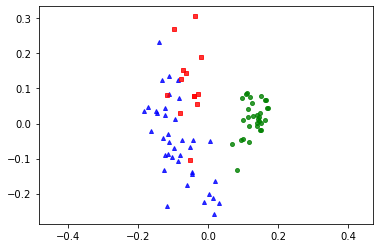

In [13]:
new_df=svd_df.drop(columns = ['continent'])
new_df=np.array(new_df)
from sklearn.cluster import KMeans
kmeans_svd = KMeans(n_clusters=3, random_state=0).fit(new_df)
kmeans_display(new_df, kmeans_svd.labels_)

In [14]:
#Giả sử với K=2

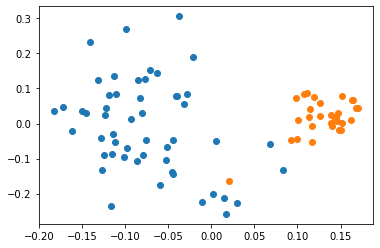

In [15]:
svd_dfH = pd.DataFrame(U[:, 0:2], columns = ['SVD1', 'SVD2'])
svd_dfH['continent'] = life_afica_europe['continent'].tolist()
plt.scatter(x= svd_dfH.query('continent == "Africa"')['SVD1'],
            y= svd_dfH.query('continent == "Africa"')['SVD2'])
plt.scatter(x= svd_dfH.query('continent == "Europe"')['SVD1'],
            y= svd_dfH.query('continent == "Europe"')['SVD2'])


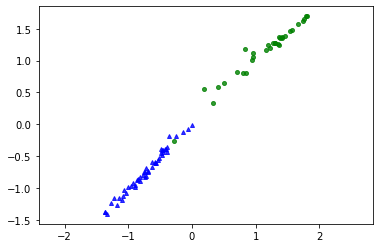

In [16]:
from sklearn.cluster import KMeans
kmeansT = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans_display(X, kmeansT.labels_)

In [17]:
# 3 - so sánh
''' scatter của SVD dễ nhìn hơn kmeans
    Phân cụm sau khi SVD giúp tính toán nhanh hơn, dữ liệu gọn gàng đơn giản hơn
'''

' scatter của SVD dễ nhìn hơn kmeans\n    Phân cụm sau khi SVD giúp tính toán nhanh hơn, dữ liệu gọn gàng đơn giản hơn\n'

In [18]:
#4 - SVD

def SVD(data):
    MTm=np.dot(data.T,data)
    r,V=np.linalg.eig(MTm)
    S = np.diag(np.power(r, 0.5))
    sqrt_s=np.linalg.inv(S)
    U=np.dot((np.dot(data,V)),sqrt_s)
    return U , np.diag(S) , V.T
u,s,vh=SVD(df_data_scaled)
u_svd, s_svd, v_svd = np.linalg.svd(df_data_scaled)

In [19]:
print('s\n',s)
print('s_svd\n',s_svd)

s
 [30.24364085  6.22029408  3.64162999  1.73218438  1.02337101  0.90383377
  0.50601323  0.29280646  0.26630751  0.21192836  0.16923088  0.13317875]
s_svd
 [30.24364085  6.22029408  3.64162999  1.73218438  1.02337101  0.90383377
  0.50601323  0.29280646  0.26630751  0.21192836  0.16923088  0.13317875]


In [20]:
print('vh\n',vh)
print('v_svd\n',v_svd)

vh
 [[ 2.87747601e-01  2.90290567e-01  2.91749398e-01  2.93099969e-01
   2.93843445e-01  2.94697310e-01  2.94258619e-01  2.93101291e-01
   2.85273510e-01  2.85079210e-01  2.78371286e-01  2.75823714e-01]
 [ 2.84067576e-01  2.73240893e-01  2.56380081e-01  2.32411293e-01
   2.03499465e-01  1.54447664e-01  8.83406844e-02 -1.37828992e-03
  -2.06472392e-01 -3.87744848e-01 -4.76758384e-01 -4.81198203e-01]
 [ 2.97433998e-01  2.41459696e-01  1.80719226e-01  1.05616410e-01
  -1.04577870e-02 -1.42961241e-01 -2.79221008e-01 -3.87798383e-01
  -5.47203193e-01 -1.22645040e-01  3.04023709e-01  3.91935164e-01]
 [-4.66654101e-01 -2.64099932e-01 -5.91160517e-02  1.14359552e-01
   2.83277503e-01  3.10546024e-01  3.14069683e-01  2.03468186e-01
  -4.73478873e-01 -3.02774335e-01  8.64048221e-02  2.36364088e-01]
 [ 5.06647389e-01  1.95660614e-02 -2.84126317e-01 -3.40282753e-01
  -3.46398292e-01 -6.83480871e-02  3.33735724e-01  4.62407318e-01
  -2.43552984e-01 -1.32909442e-01 -3.74956848e-02  1.34734092e-01]
 

In [21]:
print('u\n',u)

u
 [[ 1.49395509e-02 -2.12346114e-01 -1.05691861e-01  1.06540468e-01
   1.12268351e-01  3.83373526e-02 -8.35888711e-02  1.78008844e-01
   1.09193588e-01 -1.25736058e-01  8.79075225e-02  3.78661164e-02]
 [-1.72655943e-01  4.62382097e-02  7.06964594e-02 -3.24265193e-02
  -1.37957303e-01  7.56182365e-03  1.66155086e-01 -1.35582686e-01
  -2.24616725e-02  4.39755084e-02  1.11850087e-02  5.25414469e-02]
 [-7.59062346e-02 -4.57733374e-02 -2.21010927e-03  8.31597393e-05
  -4.21594381e-02  2.38234335e-02  6.36454946e-02 -5.21934389e-02
  -1.75842592e-01 -7.10521677e-03 -1.27880274e-03  6.25100281e-02]
 [-2.13601125e-02  1.89509948e-01 -2.45004285e-01  1.70685949e-02
   1.56840419e-01  2.70038072e-01 -6.90952480e-02 -7.31492217e-02
  -1.64518083e-01 -1.66981962e-01  1.23130555e-01 -6.96356685e-02]
 [-1.11867556e-01 -5.28541438e-02 -4.38857203e-02  9.91281921e-02
  -6.54086180e-02  1.63968871e-02  6.26797327e-02 -6.01823412e-02
   1.62218042e-02  2.75319546e-02  2.40679346e-03  5.07847438e-02]
 [

In [22]:
print('u_svd\n',u)

u_svd
 [[ 1.49395509e-02 -2.12346114e-01 -1.05691861e-01  1.06540468e-01
   1.12268351e-01  3.83373526e-02 -8.35888711e-02  1.78008844e-01
   1.09193588e-01 -1.25736058e-01  8.79075225e-02  3.78661164e-02]
 [-1.72655943e-01  4.62382097e-02  7.06964594e-02 -3.24265193e-02
  -1.37957303e-01  7.56182365e-03  1.66155086e-01 -1.35582686e-01
  -2.24616725e-02  4.39755084e-02  1.11850087e-02  5.25414469e-02]
 [-7.59062346e-02 -4.57733374e-02 -2.21010927e-03  8.31597393e-05
  -4.21594381e-02  2.38234335e-02  6.36454946e-02 -5.21934389e-02
  -1.75842592e-01 -7.10521677e-03 -1.27880274e-03  6.25100281e-02]
 [-2.13601125e-02  1.89509948e-01 -2.45004285e-01  1.70685949e-02
   1.56840419e-01  2.70038072e-01 -6.90952480e-02 -7.31492217e-02
  -1.64518083e-01 -1.66981962e-01  1.23130555e-01 -6.96356685e-02]
 [-1.11867556e-01 -5.28541438e-02 -4.38857203e-02  9.91281921e-02
  -6.54086180e-02  1.63968871e-02  6.26797327e-02 -6.01823412e-02
   1.62218042e-02  2.75319546e-02  2.40679346e-03  5.07847438e-02